In [1]:
import pandas as pd

In [3]:
bios = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [94]:
coffee = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv')
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [125]:
import numpy as np
coffee["price_discount"] = np.where(coffee["Coffee Type"] == "Espresso", 2.99, 4.99)
coffee["price_discount_2"] = np.where(coffee["Coffee Type"] == "Espresso", 2.99, 4.99)
coffee["price"] = np.where(coffee["Coffee Type"] == "Espresso", 3.99, 5.99)
coffee["revenue"] = coffee["Units Sold"] * coffee["price"]
coffee.drop(columns=["price_discount_2"], inplace=True) # inplace drop remove from the original dataframe!!!
coffee.head()

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25,2.99,3.99,99.75
1,Monday,Latte,15,4.99,5.99,89.85
2,Tuesday,Espresso,30,2.99,3.99,119.70
3,Tuesday,Latte,20,4.99,5.99,119.80
4,Wednesday,Espresso,35,2.99,3.99,139.65


In [96]:
coffee.rename(columns={"Coffee Type": "coffee_type", "Units Sold": "units_sold"}, inplace=True)

In [97]:
coffee.head()

,Day,coffee_type,units_sold,price_discount,price,revenue
0,Monday,Espresso,25,2.99,3.99,99.75
1,Monday,Latte,15,4.99,5.99,89.85
2,Tuesday,Espresso,30,2.99,3.99,119.70
3,Tuesday,Latte,20,4.99,5.99,119.80
4,Wednesday,Espresso,35,2.99,3.99,139.65


In [98]:
bios = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [99]:
bios["born_datetime"] = pd.to_datetime(bios["born_date"], format="%Y-%m-%d")
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [100]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   athlete_id     145500 non-null  int64         
 1   name           145500 non-null  object        
 2   born_date      143693 non-null  object        
 3   born_city      110908 non-null  object        
 4   born_region    110908 non-null  object        
 5   born_country   110908 non-null  object        
 6   NOC            145499 non-null  object        
 7   height_cm      106651 non-null  float64       
 8   weight_kg      102070 non-null  float64       
 9   died_date      33940 non-null   object        
 10  born_datetime  143693 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 12.2+ MB


In [101]:
bios['birth_year'] = bios['born_date'].dt.year
bios.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
bios["height_category"] = bios["height_cm"].apply(lambda x: "Tall" if x >= 180 else ("Average" if x>=165 else "Short"))
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime,height_category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12,Short
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01,Tall
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13,Tall
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11,Average
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17,Short


In [11]:
def category_height(row):
    if row["height_cm"] <= 180 or row["weight_kg"] < 60:
        return "Lightweight"
    elif row["height_cm"] >= 185 or row["weight_kg"] <= 80:
        return "Middleweight"
    else:
        return "Haeavyweight"
    
bios["category_weight"] = bios.apply(category_height, axis=1)
bios.sample(6)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,category_weight
133213,136149,Nezir Karap,1994-01-02,İstanbul,İstanbul,TUR,Türkiye,179.0,74.0,NaN,Lightweight
16818,16936,Eom Yeong-Seop,1964-07-10,NaN,NaN,NaN,Republic of Korea,182.0,76.0,NaN,Middleweight
7753,7794,Gu Yong-Jo,1955-07-17,NaN,NaN,NaN,Democratic People's Republic of Korea,172.0,57.0,NaN,Lightweight
140928,144457,Moeka Kijima,1999-09-02,NaN,NaN,NaN,Japan,NaN,NaN,NaN,Haeavyweight
15002,15103,Klaus Kobusch,1941-03-15,NaN,NaN,NaN,Germany West Germany,177.0,75.0,NaN,Lightweight
44278,44618,Charles Billings,1866-11-26,Eatontown,New Jersey,USA,United States,NaN,NaN,1928-12-13,Haeavyweight


In [26]:
bios["category_weight"].max()


'Middleweight'

In [31]:
bios = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [30]:
noc = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/noc_regions.csv')
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [32]:
bios_new = pd.merge(bios, noc, left_on="born_country", right_on="NOC", how="left")
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,NOC_y,region,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,GBR,UK,NaN


In [33]:
usa = bios_new[bios_new["born_country"] == "USA"].copy()
gbr = bios_new[bios_new["born_country"] == "GBR"].copy()
usa.head()


,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,NOC_y,region,notes
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN,USA,USA,NaN
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN,USA,USA,NaN
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN,USA,USA,NaN
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20,USA,USA,NaN
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN,USA,USA,NaN


In [34]:
gbr.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,NOC_y,region,notes
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,GBR,UK,NaN
37,38,Helen Aitchison,1881-12-06,Sunderland,England,GBR,Great Britain,NaN,NaN,1947-05-26,GBR,UK,NaN
38,39,Geraldine Beamish,1883-06-23,Forest Gate,England,GBR,Great Britain,NaN,NaN,1972-05-10,GBR,UK,NaN
39,40,Dora Boothby,1881-08-02,Finchley,England,GBR,Great Britain,NaN,NaN,1970-02-22,GBR,UK,NaN
40,41,Julie Bradbury,1967-02-12,Oxford,England,GBR,Great Britain,175.0,64.0,NaN,GBR,UK,NaN


In [35]:
bios_us_gbr = pd.concat([usa, gbr], ignore_index=True, sort=True)
bios_us_gbr.tail(20)

,NOC_x,NOC_y,athlete_id,born_city,born_country,born_date,born_region,died_date,height_cm,name,notes,region,weight_kg
15413,Great Britain,GBR,148355,Edinburgh,GBR,1994-08-27,Scotland,NaN,NaN,Bruce Mouat,NaN,UK,NaN
15414,Great Britain,GBR,148357,Chelmsford,GBR,1998-02-15,England,NaN,NaN,Leonie Gerken Schofield,NaN,UK,NaN
15415,Great Britain,GBR,148358,Chelmsford,GBR,1999-06-04,England,NaN,NaN,Makayla Gerken Schofield,NaN,UK,NaN
15416,Great Britain,GBR,148359,Guildford,GBR,1997-05-15,England,NaN,NaN,Ollie Davies,NaN,UK,NaN
15417,Great Britain,GBR,148360,Norwich,GBR,1999-07-13,England,NaN,NaN,William Feneley,NaN,UK,NaN
15418,Great Britain,GBR,148362,Dundee,GBR,1995-01-14,Scotland,NaN,NaN,Natasha McKay,NaN,UK,NaN
15419,Great Britain,GBR,148363,Prestwick,GBR,1994-05-01,Scotland,NaN,NaN,Lewis Gibson,NaN,UK,NaN
15420,Great Britain,GBR,148364,Bradford,GBR,1997-08-25,England,NaN,NaN,Katie Ormerod,NaN,UK,NaN
15421,Great Britain,GBR,148365,Bolton,GBR,2001-11-12,England,NaN,NaN,Huw Nightingale,NaN,UK,NaN
15422,Great Britain,GBR,148366,Saddleworth,GBR,1994-07-20,England,NaN,NaN,Brogan Crowley,NaN,UK,NaN


In [ ]:
results = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/results.csv')
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [ ]:
combined_df = pd.merge(results,bios,on="athlete_id", how = "left")
combined_df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02


In [124]:
coffee = pd.read_csv(
    'https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv')
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [105]:
coffee.head()

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25,2.99,3.99,99.75
1,Monday,Latte,15,4.99,5.99,89.85
2,Tuesday,Espresso,30,2.99,3.99,119.70
3,Tuesday,Latte,20,4.99,5.99,119.80
4,Wednesday,Espresso,35,2.99,3.99,139.65


In [113]:
coffee.loc[[2,3],"Units Sold"]= np.nan
coffee.head(10)

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25.0,2.99,3.99,99.75
1,Monday,Latte,15.0,4.99,5.99,89.85
2,Tuesday,Espresso,NaN,2.99,3.99,119.70
3,Tuesday,Latte,NaN,4.99,5.99,119.80
4,Wednesday,Espresso,35.0,2.99,3.99,139.65
5,Wednesday,Latte,25.0,4.99,5.99,149.75
6,Thursday,Espresso,40.0,2.99,3.99,159.60
7,Thursday,Latte,30.0,4.99,5.99,179.70
8,Friday,Espresso,45.0,2.99,3.99,179.55
9,Friday,Latte,35.0,4.99,5.99,209.65


In [81]:
coffee.isna().sum()

Day               0
Coffee Type       0
Units Sold        2
price_discount    0
price             0
revenue           0
dtype: int64

In [90]:
# coffee.drop(columns=["Unit Sold"],inplace=True)
coffee.head()

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25.0,2.99,3.99,99.75
1,Monday,Latte,NaN,4.99,5.99,89.85
2,Tuesday,Espresso,NaN,2.99,3.99,119.70
3,Tuesday,Latte,20.0,4.99,5.99,119.80
4,Wednesday,Espresso,35.0,2.99,3.99,139.65


In [ ]:
coffee.fillna(coffee["Units Sold"].mean())

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25.000000,2.99,3.99,99.75
1,Monday,Latte,34.583333,4.99,5.99,89.85
2,Tuesday,Espresso,34.583333,2.99,3.99,119.70
3,Tuesday,Latte,20.000000,4.99,5.99,119.80
4,Wednesday,Espresso,35.000000,2.99,3.99,139.65
5,Wednesday,Latte,25.000000,4.99,5.99,149.75
6,Thursday,Espresso,40.000000,2.99,3.99,159.60
7,Thursday,Latte,30.000000,4.99,5.99,179.70
8,Friday,Espresso,45.000000,2.99,3.99,179.55
9,Friday,Latte,35.000000,4.99,5.99,209.65


In [111]:
coffee["Units Sold"] = coffee["Units Sold"].interpolate()

In [114]:
coffee.head()

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25.0,2.99,3.99,99.75
1,Monday,Latte,15.0,4.99,5.99,89.85
2,Tuesday,Espresso,NaN,2.99,3.99,119.70
3,Tuesday,Latte,NaN,4.99,5.99,119.80
4,Wednesday,Espresso,35.0,2.99,3.99,139.65


In [115]:
coffee.dropna(subset=["Units Sold"])

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25.0,2.99,3.99,99.75
1,Monday,Latte,15.0,4.99,5.99,89.85
4,Wednesday,Espresso,35.0,2.99,3.99,139.65
5,Wednesday,Latte,25.0,4.99,5.99,149.75
6,Thursday,Espresso,40.0,2.99,3.99,159.60
7,Thursday,Latte,30.0,4.99,5.99,179.70
8,Friday,Espresso,45.0,2.99,3.99,179.55
9,Friday,Latte,35.0,4.99,5.99,209.65
10,Saturday,Espresso,45.0,2.99,3.99,179.55
11,Saturday,Latte,35.0,4.99,5.99,209.65


In [116]:
coffee[coffee["Units Sold"].isna()]

,Day,Coffee Type,Units Sold,price_discount,price,revenue
2,Tuesday,Espresso,NaN,2.99,3.99,119.7
3,Tuesday,Latte,NaN,4.99,5.99,119.8


In [117]:
coffee[coffee["Units Sold"].notna()]

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25.0,2.99,3.99,99.75
1,Monday,Latte,15.0,4.99,5.99,89.85
4,Wednesday,Espresso,35.0,2.99,3.99,139.65
5,Wednesday,Latte,25.0,4.99,5.99,149.75
6,Thursday,Espresso,40.0,2.99,3.99,159.60
7,Thursday,Latte,30.0,4.99,5.99,179.70
8,Friday,Espresso,45.0,2.99,3.99,179.55
9,Friday,Latte,35.0,4.99,5.99,209.65
10,Saturday,Espresso,45.0,2.99,3.99,179.55
11,Saturday,Latte,35.0,4.99,5.99,209.65


In [118]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [119]:
bios["born_city"].value_counts() 

born_city
Budapest           1378
Moskva (Moscow)     883
Oslo                708
Stockholm           629
Praha (Prague)      600
                   ... 
Bodrogkisfalud        1
Ternberg              1
Klaus                 1
Plaški                1
Dulwich Hill          1
Name: count, Length: 22368, dtype: int64

In [123]:
bios[bios["born_country"] == "USA"]["born_region"].value_counts()

born_region
California              1634
New York                 990
Illinois                 585
Pennsylvania             530
Massachusetts            530
New Jersey               381
Texas                    368
Minnesota                365
Ohio                     328
Michigan                 319
Washington               240
Florida                  235
Wisconsin                209
Colorado                 207
Connecticut              156
Indiana                  150
Oregon                   132
Georgia                  129
Virginia                 121
Maryland                 117
District of Columbia     107
Iowa                     102
Hawaiʻi                   95
Kansas                    94
Oklahoma                  93
Louisiana                 92
Utah                      91
Missouri                  91
North Carolina            86
Arizona                   83
New Hampshire             83
Vermont                   68
Mississippi               66
Alabama                   64
Ke

In [126]:
coffee.head()

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25,2.99,3.99,99.75
1,Monday,Latte,15,4.99,5.99,89.85
2,Tuesday,Espresso,30,2.99,3.99,119.70
3,Tuesday,Latte,20,4.99,5.99,119.80
4,Wednesday,Espresso,35,2.99,3.99,139.65


In [127]:
coffee.groupby(["Coffee Type"])["Units Sold"].mean()

Coffee Type
Espresso    37.857143
Latte       27.857143
Name: Units Sold, dtype: float64

In [129]:
coffee.groupby(["Coffee Type"]).agg({"Units Sold":"sum", "price":"mean"})

,Units Sold,price
Coffee Type,,
Espresso,265,3.99
Latte,195,5.99


In [133]:
coffee.groupby(["Coffee Type"])["Units Sold"].median()

Coffee Type
Espresso    40.0
Latte       30.0
Name: Units Sold, dtype: float64

In [136]:
pivot = coffee.pivot(columns="Coffee Type", index="Day", values = "revenue")

In [137]:
pivot

Coffee Type,Espresso,Latte
Day,,
Friday,179.55,209.65
Monday,99.75,89.85
Saturday,179.55,209.65
Sunday,179.55,209.65
Thursday,159.60,179.70
Tuesday,119.70,119.80
Wednesday,139.65,149.75


In [138]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [157]:
bios["born_date"]  = pd.to_datetime(bios["born_date"])
bios["month_born"] = bios["born_date"].dt.month
bios["year_born"] = bios["born_date"].dt.year

In [154]:
bios.groupby(bios["born_date"].dt.year)["name"].count().reset_index().sort_values("name",ascending = False)
# ["name"].count().reset_index().sort_values()

,born_date,name
139,1972.0,2231
152,1985.0,2227
140,1973.0,2216
138,1971.0,2205
137,1970.0,2174
...,...,...
5,1838.0,1
4,1837.0,1
3,1836.0,1
2,1833.0,1


In [158]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime,month_born,year_born
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12,12.0,1886.0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01,4.0,1969.0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13,8.0,1898.0
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11,5.0,1895.0
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17,4.0,1878.0


In [160]:
bios.groupby([bios["year_born"],bios["month_born"]])["name"].count(
).reset_index().sort_values("name", ascending=False)

,year_born,month_born,name
1437,1970.0,1.0,239
1461,1972.0,1.0,229
1629,1986.0,1.0,227
1497,1975.0,1.0,227
1617,1985.0,1.0,225
...,...,...,...
95,1857.0,5.0,1
96,1857.0,7.0,1
97,1857.0,8.0,1
98,1857.0,9.0,1


In [161]:
coffee.head()

,Day,Coffee Type,Units Sold,price_discount,price,revenue
0,Monday,Espresso,25,2.99,3.99,99.75
1,Monday,Latte,15,4.99,5.99,89.85
2,Tuesday,Espresso,30,2.99,3.99,119.70
3,Tuesday,Latte,20,4.99,5.99,119.80
4,Wednesday,Espresso,35,2.99,3.99,139.65


In [162]:
pd.__version__

'2.3.3'

In [163]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime,month_born,year_born
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12,12.0,1886.0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01,4.0,1969.0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13,8.0,1898.0
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11,5.0,1895.0
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17,4.0,1878.0


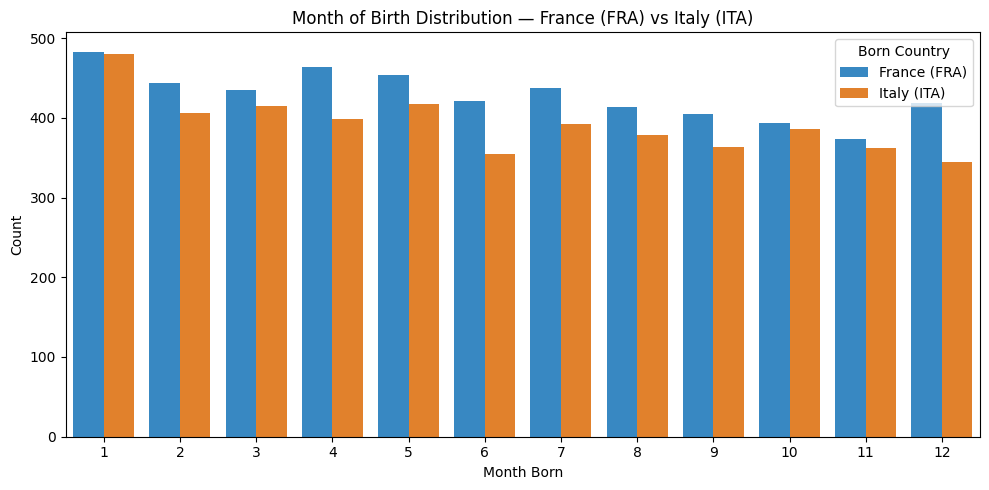

In [172]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter bios for Italy (ITA) and France (FRA)
df_noc = bios[bios["born_country"].isin(["ITA", "FRA"])].dropna(subset=["month_born"]).copy()
df_noc["month_born"] = df_noc["month_born"].astype(int)

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_noc,
    x="month_born",
    hue="born_country",
    hue_order=["FRA", "ITA"],
    order=list(range(1, 13)),
    palette=["#218CD9", "#ff7f0e"]
)
plt.xlabel("Month Born")
plt.ylabel("Count")
plt.title("Month of Birth Distribution — France (FRA) vs Italy (ITA)")
plt.legend(title="Born Country", labels=["France (FRA)", "Italy (ITA)"])
plt.xticks(ticks=list(range(0, 12)), labels=list(range(1, 13)))
# sns.despine()
plt.tight_layout()
plt.show()